Processed 50015/50015 images
Conversion to grayscale completed.
Processed 50015 images for face extraction.


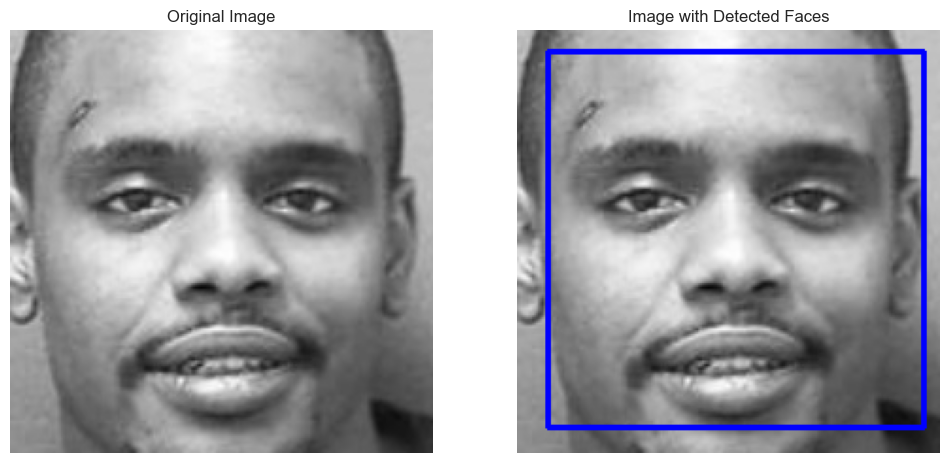

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Define the input and output folder paths
input_folder_path = 'New_Algorithm/MORPH II'
output_folder_path = './MORPH II_Grayscale_Images'
cropped_folder_path = './MORPH II_cropped'

def convert_images_to_grayscale(input_folder_path, output_folder_path):
    """
    Converts all images in the input folder to grayscale and saves them in the output folder.

    Args:
        input_folder_path (str): Path to the folder containing the original images.
        output_folder_path (str): Path to the folder where grayscale images will be saved.

    Outputs:
        Saves grayscale images in the specified output folder, maintaining the directory structure.
    """
    # Create the output folder if it does not exist
    os.makedirs(output_folder_path, exist_ok=True)

    # Get total number of images for progress monitoring
    total_images = sum([len(files) for r, d, files in os.walk(input_folder_path) 
                        if any(file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')) for file in files)])
    processed_images = 0

    # List to store paths of all processed images
    processed_image_paths = []

    # Iterate over all subdirectories in the input folder
    for subdir, _, files in os.walk(input_folder_path):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                # Construct the full file path
                file_path = os.path.join(subdir, file_name)
                relative_path = os.path.relpath(subdir, input_folder_path)
                dest_subdir = os.path.join(output_folder_path, relative_path)

                # Ensure the destination subdirectory exists
                os.makedirs(dest_subdir, exist_ok=True)

                # Load the image
                image = cv2.imread(file_path)

                # Convert to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Save the grayscale image to the output folder
                gray_file_path = os.path.join(dest_subdir, file_name)
                cv2.imwrite(gray_file_path, gray_image)

                # Add the path to the list of processed images
                processed_image_paths.append(gray_file_path)

                # Update progress
                processed_images += 1
                print(f"Processed {processed_images}/{total_images} images", end='\r')

    print("\nConversion to grayscale completed.")

def extract_and_resize_faces(filename, destination_dir):
    """
    Detects faces in an image, extracts them, resizes, and saves them to the destination directory.

    Args:
        filename (str): Path to the image file.
        destination_dir (str): Path to the folder where extracted face images will be saved.

    Outputs:
        Saves resized face images in the specified destination directory, maintaining the directory structure.
    """
    # Load the image
    data = cv2.imread(filename)
    gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    
    # Load the pre-trained Haar cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Get the source subfolder name
    source_subfolder = os.path.relpath(os.path.dirname(filename), output_folder_path)
    
    # Create the corresponding subfolder in the destination directory if it doesn't exist
    source_destination_dir = os.path.join(destination_dir, source_subfolder)
    os.makedirs(source_destination_dir, exist_ok=True)
    
    # Save each detected face to the appropriate subfolder
    for i, (x, y, w, h) in enumerate(faces):
        face = data[y:y+h, x:x+w]  # Extract the face
        resized_face = cv2.resize(face, (224, 224))  # Resize to 224x224
        face_filename = os.path.join(source_destination_dir, f"{os.path.splitext(os.path.basename(filename))[0]}_face_{i}.jpg")
        cv2.imwrite(face_filename, resized_face)  # Save the face image

def process_all_images(source_dir, destination_dir):
    """
    Processes all images in the source directory to extract faces and save them in the destination directory.

    Args:
        source_dir (str): Path to the folder containing images to be processed.
        destination_dir (str): Path to the folder where extracted face images will be saved.

    Outputs:
        Saves extracted face images in the specified destination directory.
    """
    image_count = 0
    for subdir, _, files in os.walk(source_dir):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                # Construct the full file path
                file_path = os.path.join(subdir, file_name)
                
                # Extract faces, resize them, and save them
                extract_and_resize_faces(file_path, destination_dir)
                image_count += 1
    print(f"Processed {image_count} images for face extraction.")

# Convert images to grayscale
convert_images_to_grayscale(input_folder_path, output_folder_path)

# Process all images in the grayscale output directory for face extraction
process_all_images(output_folder_path, cropped_folder_path)


def display_random_image_with_faces(source_dir):
    """
    Displays a random image with bounding boxes around detected faces.

    Args:
        source_dir (str): Path to the folder containing images.
    """
    image_files = []
    for subdir, _, files in os.walk(source_dir):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                image_files.append(os.path.join(subdir, file_name))
    
    if not image_files:
        print("No images found in the source directory.")
        return
    
    random_file = random.choice(image_files)
    data = cv2.imread(random_file)
    gray = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Create a copy of the image to draw bounding boxes
    data_with_boxes = data.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(data_with_boxes, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Plot the original image and the image with bounding boxes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(data, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(data_with_boxes, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Image with Detected Faces")
    axes[1].axis('off')
    
    plt.show()

# Display a random image with bounding boxes around detected faces from the cropped folder
display_random_image_with_faces(cropped_folder_path)


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from transformers import ViTFeatureExtractor, ViTModel
from skimage.feature import local_binary_pattern
from tqdm import tqdm
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Function to process images in the directory and extract features
def process_images_in_directory(source_dir):
    features = []
    labels = []
    label_map = {}
    reverse_label_map = {}
    current_label = 0

    # Walk through all subfolders in the source directory
    for root, dirs, files in os.walk(source_dir):
        for file in tqdm(files):
            if file.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale for LBP
                if img is None:
                    continue

                # Extract image features
                sift_features = extract_sift_features(img)
                lbp_features = extract_lbp_features(img)
                vit_features = extract_vit_features(img_path)

                combined_features = concatenate_features(sift_features, lbp_features, vit_features)
                features.append(combined_features)

                # Assign labels based on the folder name
                folder_name = os.path.basename(root)
                if folder_name not in label_map:
                    label_map[folder_name] = current_label
                    reverse_label_map[current_label] = folder_name
                    current_label += 1

                labels.append(label_map[folder_name])

    return np.array(features), np.array(labels), label_map, reverse_label_map


# Use the original ViT model
class OriginalViTModel(nn.Module):
    def __init__(self):
        super(OriginalViTModel, self).__init__()
        # Load the pretrained ViT model
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

    def forward(self, inputs):
        # Extract the original ViT features
        outputs = self.vit(**inputs)
        last_hidden_state = outputs.last_hidden_state
        return last_hidden_state

# Initialize the ViT feature extractor and the original ViT model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = OriginalViTModel()

# Function to extract ViT features
def extract_vit_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    inputs = feature_extractor(images=img, return_tensors="pt")
    with torch.no_grad():
        outputs = model(inputs)
    return outputs.flatten().detach().numpy()

# Other functions remain unchanged
def extract_sift_features(img):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    if descriptors is None:
        descriptors = np.zeros((1, 128))  # Assuming 128-dimensional descriptors
    return descriptors

def extract_lbp_features(img):
    lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

def concatenate_features(sift_features, lbp_features, vit_features):
    sift_features = sift_features.flatten() if sift_features is not None else np.zeros(128)
    lbp_features = lbp_features.flatten() if lbp_features is not None else np.zeros(11)
    vit_features = vit_features.flatten() if vit_features is not None else np.zeros(768)

    combined_features = np.concatenate((sift_features, lbp_features, vit_features))

    fixed_length = 907  # Ensure the combined feature vector has a consistent size
    if len(combined_features) < fixed_length:
        combined_features = np.concatenate((combined_features, np.zeros(fixed_length - len(combined_features))))
    elif len(combined_features) > fixed_length:
        combined_features = combined_features[:fixed_length]

    return combined_features

# Process images and extract features
source_dir = './MORPH II_cropped/'
features, labels, label_map, reverse_label_map = process_images_in_directory(source_dir)

print(f"Feature vector length: {len(features[0])}")
print(len(features))

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

C:\Users\dkami\anaconda3\envs\ML-GPU\lib\site-packages\transformers\modeling_utils.py:392: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, m

Feature vector length: 907
49620


In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import umap
from openpyxl import Workbook

# Create a directory to save plots and metrics if it doesn't exist
output_dir = "model_outputs"
os.makedirs(output_dir, exist_ok=True)

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)  # Features should be defined before this line

# Dimensionality Reduction Techniques
def apply_ipca(X, n_components=5, batch_size=500):
    """
    Applies Incremental PCA to reduce dimensionality of the dataset.

    Args:
        X (np.ndarray): Input feature matrix.
        n_components (int): Number of components to keep.
        batch_size (int): Number of samples processed at a time.

    Returns:
        np.ndarray: Transformed feature matrix after applying IPCA.
    """
    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    return ipca.fit_transform(X)

def apply_umap(X, n_components=10):
    """
    Applies UMAP to reduce dimensionality of the dataset.

    Args:
        X (np.ndarray): Input feature matrix.
        n_components (int): Number of components to keep.

    Returns:
        np.ndarray: Transformed feature matrix after applying UMAP.
    """
    umap_model = umap.UMAP(n_components=n_components)
    return umap_model.fit_transform(X)

# Apply IPCA and UMAP for dimensionality reduction
X_ipca = apply_ipca(features)
X_umap = apply_umap(features)

# Classification Algorithms
models = {
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 5-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(X, y, method_name):
    """
    Evaluates different classification models using cross-validation.

    Args:
        X (np.ndarray): Input feature matrix.
        y (np.ndarray): Target labels.
        method_name (str): Name of the dimensionality reduction method used.

    Returns:
        list: A list of dictionaries containing model performance metrics.
    """
    metrics_list = []
    
    for name, model in models.items():
        train_accuracies = []
        train_precisions = []
        train_recalls = []
        train_f1_scores = []
        test_accuracies = []
        test_precisions = []
        test_recalls = []
        test_f1_scores = []
        
        for train_index, test_index in cv.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Train the model
            model.fit(X_train, y_train)

            # Predict on both train and test sets
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Calculate metrics for train set
            train_accuracies.append(accuracy_score(y_train, y_train_pred))
            train_precisions.append(precision_score(y_train, y_train_pred, average='macro'))
            train_recalls.append(recall_score(y_train, y_train_pred, average='macro'))
            train_f1_scores.append(f1_score(y_train, y_train_pred, average='macro'))

            # Calculate metrics for test set
            test_accuracies.append(accuracy_score(y_test, y_test_pred))
            test_precisions.append(precision_score(y_test, y_test_pred, average='macro'))
            test_recalls.append(recall_score(y_test, y_test_pred, average='macro'))
            test_f1_scores.append(f1_score(y_test, y_test_pred, average='macro'))

        # Store average metrics
        metrics_list.append({
            'Method': method_name,
            'Model': name,
            'Train Accuracy': np.mean(train_accuracies),
            'Train Precision': np.mean(train_precisions),
            'Train Recall': np.mean(train_recalls),
            'Train F1 Score': np.mean(train_f1_scores),
            'Test Accuracy': np.mean(test_accuracies),
            'Test Precision': np.mean(test_precisions),
            'Test Recall': np.mean(test_recalls),
            'Test F1 Score': np.mean(test_f1_scores)
        })

    # Save metrics to Excel
    metrics_df = pd.DataFrame(metrics_list)
    metrics_df.to_excel(os.path.join(output_dir, f'{method_name}_metrics.xlsx'), index=False)

    return metrics_list

# Plotting function
def plot_metrics(metrics_list, method_name):
    """
    Plots and saves metrics for the evaluated models.

    Args:
        metrics_list (list): List of dictionaries containing model performance metrics.
        method_name (str): Name of the dimensionality reduction method used.
    """
    df = pd.DataFrame(metrics_list)

    plt.figure(figsize=(12, 8))

    # Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(df['Model'], df['Train Accuracy'], marker='o', label='Train Accuracy')
    plt.plot(df['Model'], df['Test Accuracy'], marker='o', label='Test Accuracy')
    plt.title(f'Accuracy - {method_name}')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend()

    # Precision
    plt.subplot(2, 2, 2)
    plt.plot(df['Model'], df['Train Precision'], marker='o', label='Train Precision')
    plt.plot(df['Model'], df['Test Precision'], marker='o', label='Test Precision')
    plt.title(f'Precision - {method_name}')
    plt.xlabel('Model')
    plt.ylabel('Precision')
    plt.legend()

    # Recall
    plt.subplot(2, 2, 3)
    plt.plot(df['Model'], df['Train Recall'], marker='o', label='Train Recall')
    plt.plot(df['Model'], df['Test Recall'], marker='o', label='Test Recall')
    plt.title(f'Recall - {method_name}')
    plt.xlabel('Model')
    plt.ylabel('Recall')
    plt.legend()

    # F1 Score
    plt.subplot(2, 2, 4)
    plt.plot(df['Model'], df['Train F1 Score'], marker='o', label='Train F1 Score')
    plt.plot(df['Model'], df['Test F1 Score'], marker='o', label='Test F1 Score')
    plt.title(f'F1 Score - {method_name}')
    plt.xlabel('Model')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'{method_name}_metrics_plot.png'))
    plt.close()

# Evaluate for each Dimensionality Reduction Method
ipca_metrics = evaluate_model(X_ipca, labels, 'IPCA')
plot_metrics(ipca_metrics, 'IPCA')

umap_metrics = evaluate_model(X_umap, labels, 'UMAP')
plot_metrics(umap_metrics, 'UMAP')


C:\Users\dkami\anaconda3\envs\ML-GPU\lib\site-packages\xgboost\core.py:158: UserWarning: [22:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dkami\anaconda3\envs\ML-GPU\lib\site-packages\xgboost\core.py:158: UserWarning: [22:07:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dkami\anaconda3\envs\ML-GPU\lib\site-packages\xgboost\core.py:158: UserWarning: [22:07:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\User